# Student: McLaughlin, Chris

# Problem 1. The American Handwriting.

## Notes/README
- Notebook is heavy on memory usage! While in theory the notebook is coded such that it should be possible to run sequentially in an environment with enough RAM, in practice to avoid kernel crashes in the Jhub environment it is usually necessary to start the kernel, run the Setup and Data Import and Processing sections, and THEN run whichever section output is desired for. This does NOT a problem in Google Collab, so it is environment dependent!

## Acknowledgements/Citations

- https://en.wikipedia.org/wiki/Softmax_function
- https://www.mldawn.com/the-derivative-of-softmaxz-function-w-r-t-z/
- https://www.tensorflow.org/datasets/keras_example
- https://keras.io/guides/sequential_model/
- https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
- https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile
- https://keras.io/api/optimizers/
- https://www.tensorflow.org/api_docs/python/tf/keras/metrics
- https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
- https://www.pythonpool.com/numpy-reshape-3d-to-2d/
- https://www.tensorflow.org/api_docs/python/tf/keras/losses
- https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
- https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
- https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2
- https://keras.io/api/layers/regularizers/
- https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
- https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/
- https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
- https://keras.io/api/layers/pooling_layers/max_pooling2d/
- https://stackoverflow.com/questions/38971293/get-class-labels-from-keras-functional-model
- https://stackoverflow.com/questions/52696039/get-a-single-value-prediction-from-a-2-class-softmax-output
- https://www.programiz.com/python-programming/methods/list/sort
- https://stackoverflow.com/questions/10695139/sort-a-list-of-tuples-by-2nd-item-integer-value

## Setup

In [ ]:
# This should be roughly the content of the first code cell
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

In [ ]:
# Plotting support
from matplotlib import pyplot as plt
#from plotnine import *
# Standard libraries
import pandas as pd
#import sklearn as sk
from keras.datasets import mnist
import tensorflow as tf

### Data Import and Processing

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data() # From assignment spec

#train_X.shape
#test_X.shape

# Acknowledgement: the knowledge to actually DO this processing mostly comes from the tensorflow.org article linked in acknowledgements
train_X = train_X.reshape(60000,784) # Reshape data from into a 2D array - each 2D 28*28 img array in the training data will be converted to a 1D 784 array
train_X = train_X.astype(np.float32) # Convert to floats - tensorflow.org article says model expects floats - in testing it worked fine with ints but I'm keeping this here as a best practice
train_X = train_X/255 # Normalise the colour data - Neural networks work best with normalised data, the data here is colour data so a range from 0-255, as such we can normalise by dividing by 255

# Repeat for test data
test_X = test_X.reshape(10000,784)
test_X = test_X.astype(np.float32)
test_X = test_X/255

# DEBUG: Display data
#import pandas as pd
#x = pd.DataFrame(train_X)
#pd.options.display.max_columns = 800
#x.head()

## a) Derivative

The Gradient Descent algorithm involves using the derivative of a given function to determine the correct weighting of a neural network node to minimise error. The gradient at any given point is the value of the derivative of the function at that point.

We will create a function that calculates the gradient of softmax for a given input vector. The formula for softmax, from wikipedia, is:

$ f(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{k} e^{x_j}} $ for $ i $ in $ 1,...,k $ and $ z = (z_1,...,z_k) $ in k-dimension input vector

The first derivative of softmax is:

$ \frac{\delta f(x)_i}{\delta x_i} = f(x)_i - (f(x)_i)^2 $

We will make a softmax function that takes an input vector, calculates softmax for each element of the vector, combining the results into a new vector, and returns the vector, we will then create a second function that simply uses the derivative formula to return a gradient of softmax for a given input vector via calling the first function.

We'll then test the functions with a simple made up vector (10,5,2)!

In [ ]:
testvec=np.array([10,5,2])

def softmax(input_vector):
    result = np.exp(input_vector)/np.sum(np.exp(input_vector))
    return result

print("Softmax of test array:", softmax(testvec))

def gradient_sm(input_vector):
    sm = softmax(input_vector)
    return sm-sm**2

print("Gradient of test array:", gradient_sm(testvec))

Softmax of test array: [9.92976272e-01 6.69062149e-03 3.33106430e-04]
Gradient of test array: [0.0069744  0.00664586 0.000333  ]


Sweet! Both functions work as expected!

## b) Simple

## c) Keras

Model Creation:

In [ ]:
# Acknowledgment to tensorflow.org example documentation listed in acknowledgements for basic code structure here
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="sigmoid"), # 128 recommended in assignment spec - sigmoid as required
    tf.keras.layers.Dense(10, activation="softmax") # Output layer - 10 possible classifications - softmax as required by assignment spec
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"]) # sparse_categorical_crossentropy and adam optimiser are from tensorflow.org documentation after a truly ridiculous amount of time spent trying to determine the cause of abysmal accuracy - adam seems to be most commonly used optimiser generally per documentation? - using sparse_categorical_accuracy as this is designed to measure how often predictions match integer labels

Model Training:

We're going to train the model now! We'll do 5 iterations, or epochs, and plot the training accuracy as the number of iterations increases!

(NOTE: While not strictly required for part c on, it was originally my desire to plot *testing* accuracy after each epoch in addition to training accuracy. However, testing accuracy after each epoch is NOT plotted as this uses too much memory for jhub to cope with, causing the kernel to crash. As the assignment validation environment will likely match the jhub environment, this could cause issues for markers attempting to run the notebook. In an environment with more RAM access, test validation could be monitored with a simple for loop that trains the model for one epoch and then validates the model with the test data, repeating for five epochs, this would work as the fit function of the keras model is cumulative. Arguably cleaner still, a callback function could be added to the model that could run an accuracy score check.

Despite this, final testing accuracy is still given)

In [ ]:
trainhistory = model.fit(train_X, train_y, epochs=5)
print("*TEST* ACCURACY",model.evaluate(test_X,test_y)[1])

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4046 - sparse_categorical_accuracy: 0.8934
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1956 - sparse_categorical_accuracy: 0.9431
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1431 - sparse_categorical_accuracy: 0.9594
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1108 - sparse_categorical_accuracy: 0.9682
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0934 - sparse_categorical_accuracy: 0.9716
*TEST* ACCURACY 0.9715999960899353


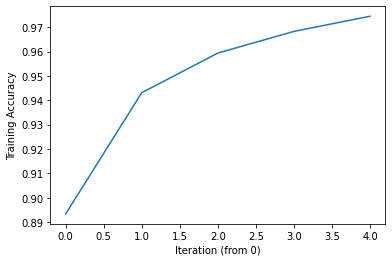

In [ ]:
plt.plot(trainhistory.history["sparse_categorical_accuracy"])
plt.ylabel("Training Accuracy")
plt.xlabel("Iteration (from 0)")
plt.show()

Nice! Our model starts strong and improves accuracy with each iteration!

## d) ReLU

Let's repeat the above, but use the relu activation function in our hidden layer instead of sigmoid!

In [ ]:
# MODEL CREATION
modelrelu = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

modelrelu.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"])

# MODEL TRAINING
trainhistory2 = modelrelu.fit(train_X, train_y, epochs=5)
print("*TEST* ACCURACY",modelrelu.evaluate(test_X,test_y)[1])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2623 - sparse_categorical_accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1139 - sparse_categorical_accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0784 - sparse_categorical_accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0584 - sparse_categorical_accuracy: 0.9821
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - sparse_categorical_accuracy: 0.9758
*TEST* ACCURACY 0.9757999777793884


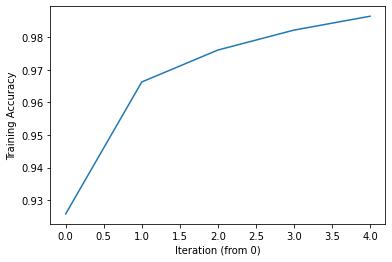

In [ ]:
plt.plot(trainhistory2.history["sparse_categorical_accuracy"])
plt.ylabel("Training Accuracy")
plt.xlabel("Iteration (from 0)")
plt.show()

And we see a slight improvement in accuracy with relu activation! It *is* possible this is just statistical variability, but the consistency of the improvement makes this unlikely.

## e) Dropout

We're going to create a model with three hidden layers rather than one now, with dropout on each hidden layer, and vary the dropout hyperparameter to determine the best value. Furthermore, each hidden layer will use L2 regularisation as required by assignment spec.

For timesaving purposes, we're only going to run one iteration/epoch per model.

The dropout hyperparameters we will test are dropout rates 0.1, 0.2, and 0.25. We'll plot the results for neatness!

**NOTE**: *Test Accuracy for each individual epoch is very much required for this part to make sense, and this is the point where jhub became more or less entirely unusuable due to memory constraints, and the notebook was moved to google collab! When marking, please ensure the environment has enough memory!!!*

313/313 [==============================] - 1s 2ms/step - loss: 0.6971 - sparse_categorical_accuracy: 0.9215


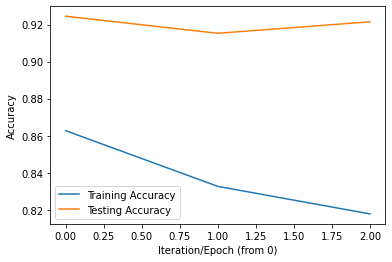

In [ ]:
# Drop Out Rate Array
DORs = [0.1, 0.2, 0.25]
trainaccuracies = []
testaccuracies = []

# Mainloop
for DOR in DORs:
    # Memory Management - Clear variables on each run through loop
    modeldropout = False
    trainhistory3 = False
    # MODEL CREATION
    modeldropout = tf.keras.models.Sequential([
        # Input layer is the visible layer
        tf.keras.layers.Dropout(DOR), # Dropout going into HL1
        tf.keras.layers.Dense(128, activation="relu", kernel_regularizer="l2"), # Hidden Layer 1
        tf.keras.layers.Dropout(DOR), # Dropout going into HL2
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer="l2"), # Hidden Layer 2
        tf.keras.layers.Dropout(DOR), # Dropout going into HL3
        tf.keras.layers.Dense(32, activation="relu", kernel_regularizer="l2"), # Hidden Layer 3
        tf.keras.layers.Dense(10, activation="softmax") # Output layer
    ])

    modeldropout.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"]) # crossentropy loss function should automatically take care of cross-validation!

    # MODEL TRAINING
    trainhistory3 = modeldropout.fit(train_X, train_y, epochs=1)
    trainaccuracies.append(trainhistory3.history["sparse_categorical_accuracy"])
    testaccuracies.append(modeldropout.evaluate(test_X,test_y)[1])

# Plot
plt.plot([0,1,2], trainaccuracies, label="Training Accuracy")
plt.plot([0,1,2], testaccuracies, label="Testing Accuracy")
#print(testaccuracies)
plt.xlabel("Iteration/Epoch (from 0)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Great! We can see that our testing accuracy *usually* peaks with a dropout hyperparameter of 0.2! However, at around 92% accuracy, it doesn't match the accuracy of our earlier models that don't utilise dropping. It is very likely that this is owing to the L2 regularlisation we employed in this model.

## f) Convolution

We now want a convolutional neural network with one convolutional layer, one pooling layer, and one fully connected layer.

A Note on hyperparameters: In testing, the hyperparameters of 128 nodes for the convolutionary layer with a kernel size of 5, coupled with a pooling layer of size 3 (corresponding to (3,3)), produced the best results, providing a model that regularly scores above 96% on training data and 98% on test data!

In [ ]:
# Shape data - acknowledgement of towardsdatascience article on CNNs for how and why to do this - Conv2D is designed with images in mind, so we want to go back to an array of 2D arrays, with a final dimension signifying greyscale - see building a cnn article in acknowledgements. Note that we COULD use Conv1D, but as it will still require transforming the data, using the image-specific implementation feels cleaner.
contrain_X=train_X.reshape(60000,28,28,1)
contest_X=test_X.reshape(10000,28,28,1)

# MODEL CREATION
modelcon = tf.keras.models.Sequential([
    # Input layer is visible layer
    tf.keras.layers.Conv2D(128, kernel_size=5, activation="relu", input_shape=(28,28,1)), # Convolution Layer
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Flatten(), # Not a real "layer" in the theoretical sense! Just flattens input going into connected layer
    tf.keras.layers.Dense(128, activation="relu"), # Fully connected layer
    tf.keras.layers.Dense(10, activation="softmax") # Output Layer
])

modelcon.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"])

# MODEL TRAINING
trainhistory4 = modelcon.fit(contrain_X, train_y, epochs=5)
modelcon.evaluate(contest_X,test_y)[1]

Epoch 1/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1182 - sparse_categorical_accuracy: 0.9635
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0285 - sparse_categorical_accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0201 - sparse_categorical_accuracy: 0.9935
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0380 - sparse_categorical_accuracy: 0.9898


0.989799976348877

And we regularly get over 98% Test Accuracy, often above 99%!!! That's the best model yet!

## g) Mugshots

Now that we have this nice collection of models, we're going to run each image in the entire dataset through each one, and record the number of misses for each, we'll take the top 9 problematic images and see if they're possible to manually identify.

(Note: All previous parts of the notebook must be run prior to running this!)

2188/2188 [==============================] - 26s 12ms/step


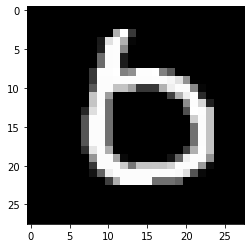

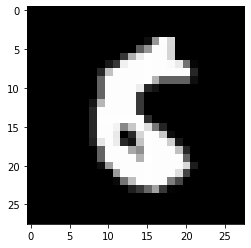

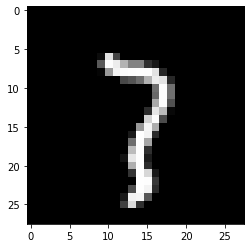

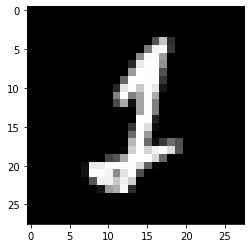

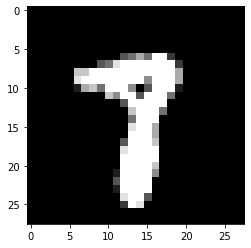

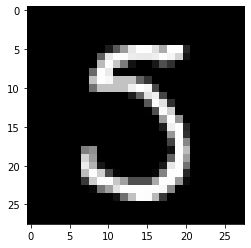

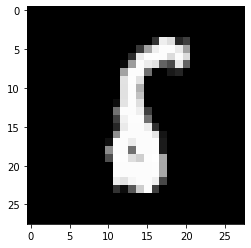

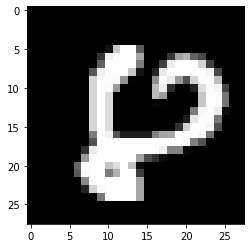

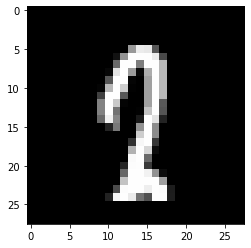

In [ ]:
combined_X = np.concatenate((train_X, test_X))
combined_y = np.concatenate((train_y, test_y))

""" list of models:
model === keras
modelrelu === relu
modeldropout === dropout
modelcon === convolution
"""

# Make Predictions
keraspreds=model.predict(combined_X).argmax(axis=1)
relupreds=modelrelu.predict(combined_X).argmax(axis=1)
dropoutpreds=modeldropout.predict(combined_X).argmax(axis=1)
conpreds=modelcon.predict(combined_X.reshape(70000,28,28,1)).argmax(axis=1) # NOTE: reshape is required for convolutionary!

# Figure out number of misses for each element in combined by index
misstable = []
for index in range(70000):
  misses = 0
  if keraspreds[index] != combined_y[index]:
    misses+=1
  if relupreds[index] != combined_y[index]:
    misses+=1
  if dropoutpreds[index] != combined_y[index]:
    misses+=1
  if conpreds[index] != combined_y[index]:
    misses+=1
  misstable.append((index,misses))

# Get Top 9 Missed Indexes
top9indices=[]
for i in sorted(misstable, key=lambda x:x[1], reverse=True)[0:9]:
  top9indices.append(i[0])

# Get the Top 9 images from their indices
top9imgs=[]
for i in top9indices:
  top9imgs.append(combined_X.reshape(70000,28,28)[i]) # Reshaping again here since matplotlib is expecting this in standard 2D image form, though we can leave out the dimension for greyscale this time!

# Display Top 9 images
for img in top9imgs:
  plt.imshow(img,cmap="gray")
  plt.show()

Here's the top nine most misidentified images across all the models! They vary slightly from run to run of the notebook, but some trends emerge and it's definitely easy to see where the confusion stems from! Common suspects are 3s with malformed bottom curves causing them to look like 2s, and 1s with exaggerated... hats? causing them to look like 7s. 6s with massive centres that look like 0s are also quite common!